In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | teya
Processing Record 2 of Set 1 | airai
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | sirsa
Processing Record 8 of Set 1 | muros
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | merauke
Processing Record 11 of Set 1 | santa isabel do rio negro
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | half moon bay
Processing Record 14 of Set 1 | letlhakane
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | husavik
Processing Record 20 of Set 1 | tessalit
Processing Record 21 of Set 1 | touros
Processing Record 22 of Set 1 | hermanus
Processing Record 

Processing Record 38 of Set 4 | liku
Processing Record 39 of Set 4 | constitucion
Processing Record 40 of Set 4 | palmer
Processing Record 41 of Set 4 | jinxiang
Processing Record 42 of Set 4 | andijon
Processing Record 43 of Set 4 | lasa
Processing Record 44 of Set 4 | faya
Processing Record 45 of Set 4 | riverton
Processing Record 46 of Set 4 | taltal
Processing Record 47 of Set 4 | trinidad
Processing Record 48 of Set 4 | ouadda
Processing Record 49 of Set 4 | balakhninskiy
Processing Record 50 of Set 4 | portland
Processing Record 1 of Set 5 | rocha
Processing Record 2 of Set 5 | maniitsoq
Processing Record 3 of Set 5 | bonavista
Processing Record 4 of Set 5 | seoul
Processing Record 5 of Set 5 | tiksi
Processing Record 6 of Set 5 | valleyview
Processing Record 7 of Set 5 | coahuayana
Processing Record 8 of Set 5 | iqaluit
Processing Record 9 of Set 5 | kozachi laheri
Processing Record 10 of Set 5 | nsukka
Processing Record 11 of Set 5 | mama
Processing Record 12 of Set 5 | chuy
Pr

Processing Record 31 of Set 8 | beaverlodge
Processing Record 32 of Set 8 | arvika
Processing Record 33 of Set 8 | vila do maio
Processing Record 34 of Set 8 | te anau
Processing Record 35 of Set 8 | tiarei
Processing Record 36 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 37 of Set 8 | fort nelson
Processing Record 38 of Set 8 | sirvintos
Processing Record 39 of Set 8 | kragero
Processing Record 40 of Set 8 | micheweni
Processing Record 41 of Set 8 | fort portal
Processing Record 42 of Set 8 | mackay
Processing Record 43 of Set 8 | dolores
Processing Record 44 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 45 of Set 8 | angat
Processing Record 46 of Set 8 | karratha
Processing Record 47 of Set 8 | odweyne
Processing Record 48 of Set 8 | lolua
City not found. Skipping...
Processing Record 49 of Set 8 | novobiryusinskiy
Processing Record 50 of Set 8 | kashan
Processing Record 1 of Set 9 | vardo
Processing Record 2 of Set 9 | aklavik
Processing Record 3 of Set

Processing Record 17 of Set 12 | acapulco
Processing Record 18 of Set 12 | innisfail
Processing Record 19 of Set 12 | montepuez
Processing Record 20 of Set 12 | miyako
Processing Record 21 of Set 12 | port keats
Processing Record 22 of Set 12 | yumen
Processing Record 23 of Set 12 | tortoli
Processing Record 24 of Set 12 | galle
Processing Record 25 of Set 12 | skovorodino
Processing Record 26 of Set 12 | murree
Processing Record 27 of Set 12 | turayf
Processing Record 28 of Set 12 | xichang
Processing Record 29 of Set 12 | aras
Processing Record 30 of Set 12 | iralaya
Processing Record 31 of Set 12 | ratnagiri
Processing Record 32 of Set 12 | ha giang
Processing Record 33 of Set 12 | tlapehuala
Processing Record 34 of Set 12 | imbituba
Processing Record 35 of Set 12 | nanakuli
Processing Record 36 of Set 12 | opaka
Processing Record 37 of Set 12 | khani
Processing Record 38 of Set 12 | ulladulla
Processing Record 39 of Set 12 | tezu
Processing Record 40 of Set 12 | pangnirtung
Process

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Teya,60.3778,92.6267,32.94,95,60,4.38,RU,2022-05-06 20:53:55
1,Airai,-8.9266,125.4092,58.64,93,8,3.53,TL,2022-05-06 20:53:56
2,Avarua,-21.2078,-159.7750,84.25,70,3,5.75,CK,2022-05-06 20:53:01
3,Vaini,-21.2000,-175.2000,75.36,88,40,5.75,TO,2022-05-06 20:53:57
4,Cape Town,-33.9258,18.4232,57.90,88,75,11.01,ZA,2022-05-06 20:53:57
5,Busselton,-33.6500,115.3333,55.02,59,0,7.11,AU,2022-05-06 20:53:58
6,Sirsa,29.5333,75.0167,87.49,23,0,6.06,IN,2022-05-06 20:53:58
7,Muros,42.7762,-9.0603,64.83,63,78,10.76,ES,2022-05-06 20:53:59
8,Upernavik,72.7868,-56.1549,15.80,80,0,7.47,GL,2022-05-06 20:53:59
9,Merauke,-8.4667,140.3333,79.30,86,38,13.44,ID,2022-05-06 20:54:00


In [8]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Teya,RU,2022-05-06 20:53:55,60.3778,92.6267,32.94,95,60,4.38
1,Airai,TL,2022-05-06 20:53:56,-8.9266,125.4092,58.64,93,8,3.53
2,Avarua,CK,2022-05-06 20:53:01,-21.2078,-159.7750,84.25,70,3,5.75
3,Vaini,TO,2022-05-06 20:53:57,-21.2000,-175.2000,75.36,88,40,5.75
4,Cape Town,ZA,2022-05-06 20:53:57,-33.9258,18.4232,57.90,88,75,11.01
...,...,...,...,...,...,...,...,...,...
566,Chamonix-Mont-Blanc,FR,2022-05-06 21:09:07,45.9238,6.8693,50.85,93,96,4.59
567,Hermiston,US,2022-05-06 21:10:15,45.8404,-119.2895,62.42,82,100,6.91
568,Nadym,RU,2022-05-06 21:11:10,65.5333,72.5167,13.39,88,100,15.19
569,Susehri,TR,2022-05-06 21:11:11,40.1644,38.0867,42.40,95,100,5.03


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

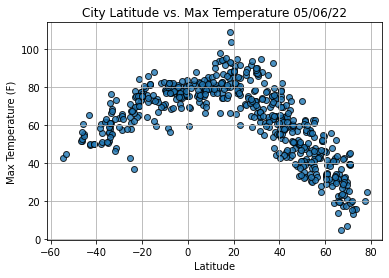

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

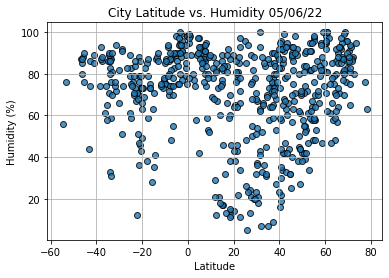

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

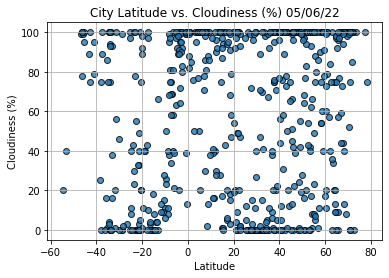

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

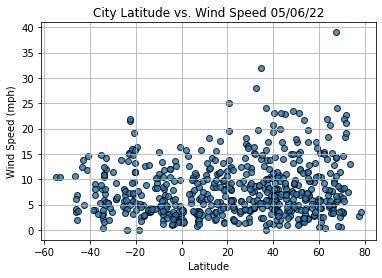

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

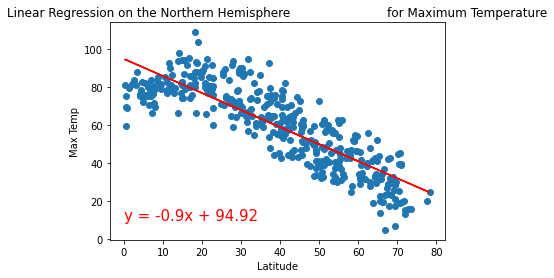

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,10))

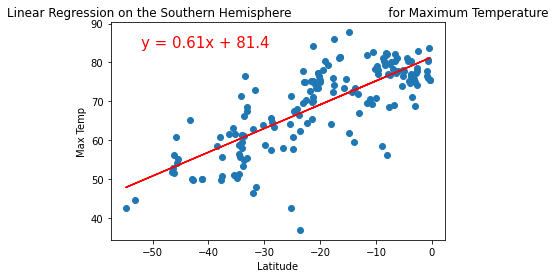

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-52,84))

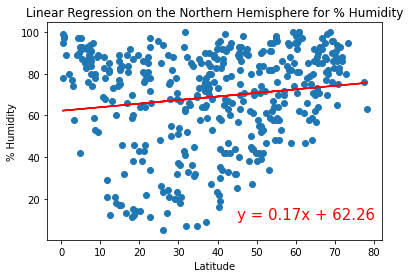

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,10))

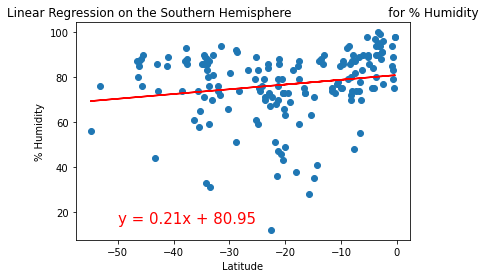

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

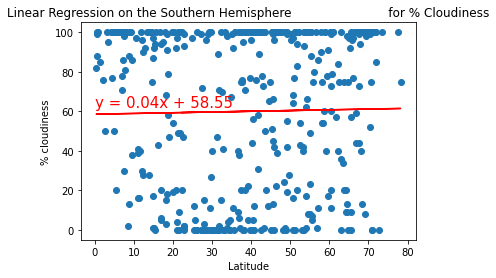

In [50]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% cloudiness',(0,62))

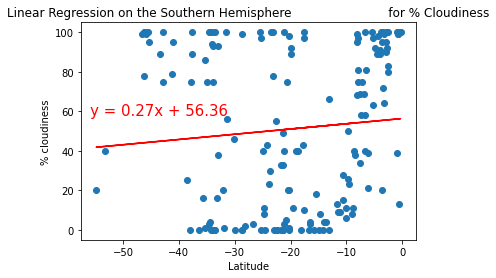

In [49]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% cloudiness',(-56,58))

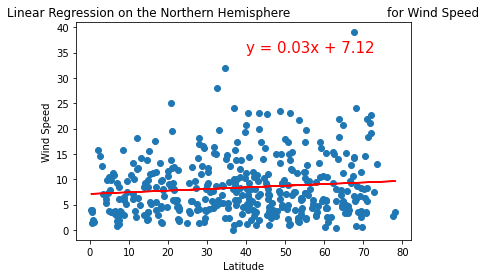

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

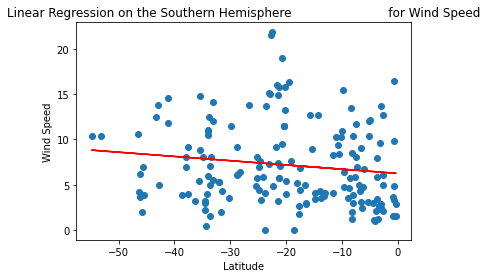

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))